# `Problem Statment`

- Iris data set consists of the physical parameters of three species of flower — Versicolor, Setosa and Virginica. 
- The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. 
- In this data we will be predicting the classes of the flowers based on these parameters.
- The data consists of continuous numeric values which describe the dimensions of the respective features. 
- We will be training the model based on these features.

>- Independent Features / Input variables :
        1. Sepal width in cm, 
        2. Sepal length in cm, 
        3. Petal width in cm,
        4. Petal length in cm       

>- Dependent Features / Traget Variables:
        1. Species

# `Step-0 : Import Library`

In [30]:
# data 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# to ignore warings

import warnings
warnings.filterwarnings('ignore')

# `Step-1 : Data Gathering`

In [31]:
# import data

df = pd.read_csv('data_iris.csv')

In [32]:
# view data

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
print(f"Max Sepal length: {df['SepalLengthCm'].max()} cm")
print(f"Max Sepal Width: {df['SepalWidthCm'].max()} cm")
print(f"Max Petal length: {df['PetalLengthCm'].max()} cm")
print(f"Max Peatl Width: {df['PetalWidthCm'].max()} cm")


Max Sepal length: 7.9 cm
Max Sepal Width: 4.4 cm
Max Petal length: 6.9 cm
Max Peatl Width: 2.5 cm


In [34]:
# frop unwanted 'id' column

df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
# describe data

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
# basic info of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
# to check number of sample in each classes

df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [38]:
# checking null values in data

df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# `Step-2 : Data Visualisation`

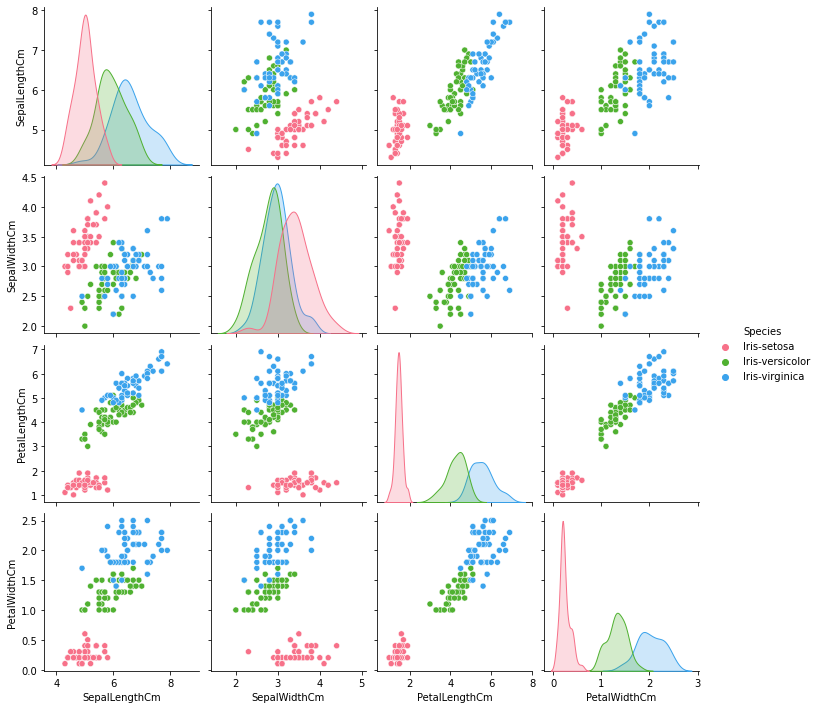

In [39]:
sns.pairplot(df, hue="Species", palette="husl")

# `Step-3 : EDA`

#### **`1. Data Visualization`**

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

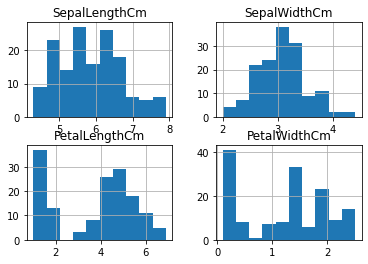

In [40]:
# ploting histogram 

df.hist()

<AxesSubplot:>

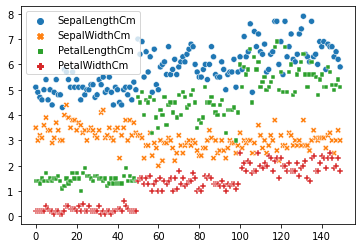

In [41]:
# ploting scatterplot

sns.scatterplot(data = df)

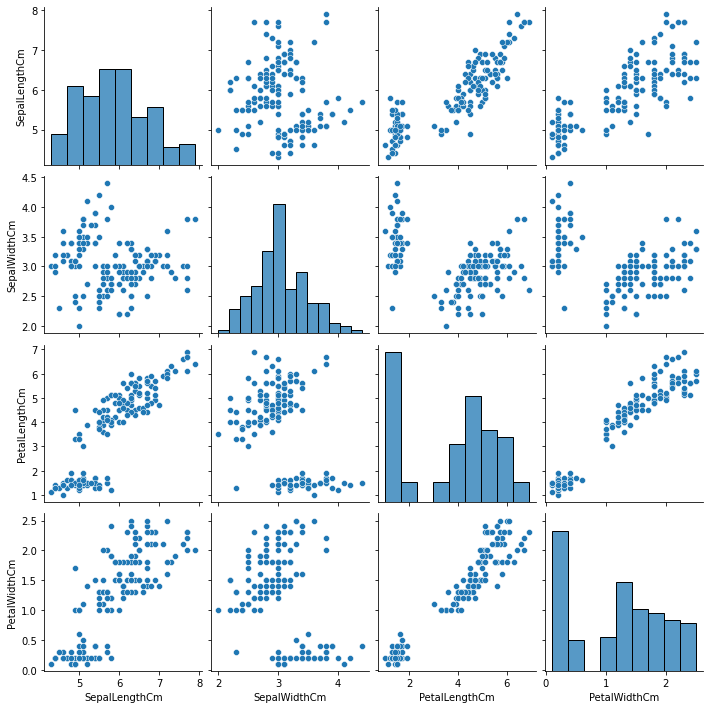

In [42]:
# ploting pairplot
sns.pairplot(df)

<AxesSubplot:>

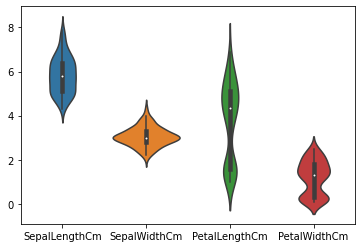

In [43]:
# ploting violin plot
sns.violinplot( data = df, split = True)

<AxesSubplot:ylabel='Density'>

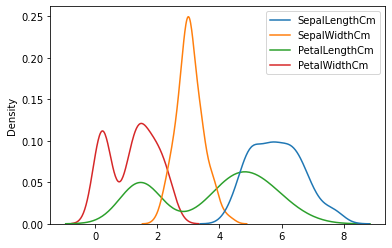

In [44]:
# ploting kde plot

sns.kdeplot(data = df , color = 'red')

#### **`2. Assumption`**

In [45]:
# checking co-relation
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

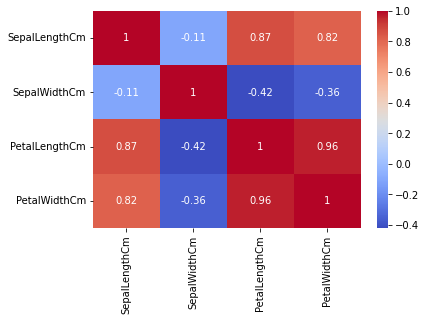

In [46]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap = 'coolwarm')

**`3. Label Encoding`**

In [47]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# df['Species'] = le.fit_transform(df['Species'])
# df.sample(5)

In [48]:
df['Species'].value_counts()
# Iris-setosa        50
# Iris-versicolor    50
# Iris-virginica     50

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# `Step-4 : Feature Engineering`

# `Step-5 : Feature Selection`

# `Step-6 : Model Training & Evaluation`

**`1. Extracting feature & labels`**

In [49]:
X = df.drop(columns=['Species'])
y = df['Species']

In [50]:
# checking shape
print(X.shape)
print(y.shape)

(150, 4)
(150,)


**`Splitiing data`**

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [52]:
# checking shape of spliting data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


**`Model Selection & Model Fitting`**


In [53]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

# model training
lr_model.fit(X_train.values, y_train)


# print metric to get performance
print("Accuracy using Logistic Regresion: ",lr_model.score(X_test, y_test) * 100)

Accuracy using Logistic Regresion:  93.33333333333333


In [54]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

# model training
knn_model.fit(X_train.values, y_train)

# print metric to get performance
print("Accuracy using KNN: ",knn_model.score(X_test, y_test) * 100)

Accuracy using KNN:  93.33333333333333


In [55]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# model training
dt_model.fit(X_train.values, y_train)

# print metric to get performance
print("Accuracy: ",dt_model.score(X_test, y_test) * 100)

Accuracy:  93.33333333333333


# `Step-7 : Creating Pickel file`

In [56]:
import pickle

with open ('model1.pkl', 'wb') as file:
    pickle.dump(dt_model,file )

# `Step-8 : Creating API in flask`

- All code in VS code

# `Step-9 : Checking Model`

In [57]:
# loading model
import os
load_model = pickle.load(open('model.pkl','rb'))

In [58]:
# prdicting result for input values 6.0, 2.2, 4.0, 1.0

# Iris-setosa=====> 0 
# Iris-versicolor=> 1 
# Iris-virginica==> 2 

load_model.predict([[5.1,3.5,1.4,0.2]])[0]

'Iris-setosa'